In [6]:
import numpy
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
#Sprint 1
#loading the dataset
#splitting the dataset into train and test


(X_train,y_train),(X_test,y_test)=mnist.load_data()



In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Sprint 1
#understanding the data

X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

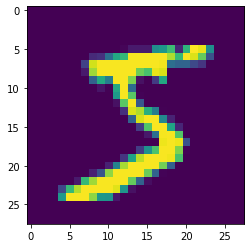

In [11]:
plt.imshow(X_train[0])

In [7]:
#Sprint 1
#reshaping the dataset
X_train=X_train.reshape(60000,28,28,1).astype('float32')
X_test=X_test.reshape(10000,28,28,1).astype('float32')

In [8]:
#Sprint 1
#one hot encoding
no_classes=10
y_train=np_utils.to_categorical(y_train,no_classes)
y_test=np_utils.to_categorical(y_test,no_classes)

In [9]:
#printing the new label
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
#Sprint 2
#Creating the model

model=Sequential()

#adding model layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))


#flatten the dimension of the image
model.add(Flatten())

#output layer with 10 neurons
model.add(Dense(no_classes,activation='softmax'))

In [16]:
#Compile the model
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

In [19]:
#fitting the model

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 133s 70ms/step - loss: 0.2068 - accuracy: 0.9543 - val_loss: 0.0820 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0641 - accuracy: 0.9803 - val_loss: 0.0869 - val_accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 133s 71ms/step - loss: 0.0470 - accuracy: 0.9855 - val_loss: 0.0810 - val_accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0896 - val_accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.1393 - val_accuracy: 0.9695


 Observing the metrics

In [20]:
#final evaluation of the model

metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss and Test Accuracy):")
print(metrics)

Metrics(Tesr loss and Test Accuracy):
[0.13925771415233612, 0.9695000052452087]


In [21]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 267ms/step
[[2.00554035e-11 3.09320120e-17 3.29157037e-14 4.59538130e-10
  2.57778689e-20 4.48461340e-15 3.88025579e-20 1.00000000e+00
  7.38416446e-12 3.22724292e-09]
 [2.27445784e-10 3.75968310e-12 1.00000000e+00 6.89282819e-14
  9.86108346e-17 3.51513529e-19 1.02042966e-11 2.09608569e-20
  4.32586231e-14 6.42716731e-24]
 [5.93559219e-13 1.00000000e+00 9.82012693e-10 2.65289066e-13
  6.25340002e-09 2.25731521e-12 2.09223375e-10 3.44775763e-08
  2.75011992e-11 8.85743128e-12]
 [1.00000000e+00 5.15908509e-21 5.68719334e-14 1.36535135e-17
  3.80047967e-18 5.10071044e-14 1.19628552e-09 2.12989452e-16
  3.06164057e-13 7.82308419e-12]]


In [22]:
print(numpy.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing the metrics

In [23]:
#final evaluation of the model

metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test loss and Test Accuracy):")
print(metrics)

Metrics(Test loss and Test Accuracy):
[0.13925771415233612, 0.9695000052452087]


In [24]:
prediction=model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 92ms/step
[[2.00554035e-11 3.09320120e-17 3.29157037e-14 4.59538130e-10
  2.57778689e-20 4.48461340e-15 3.88025579e-20 1.00000000e+00
  7.38416446e-12 3.22724292e-09]
 [2.27445784e-10 3.75968310e-12 1.00000000e+00 6.89282819e-14
  9.86108346e-17 3.51513529e-19 1.02042966e-11 2.09608569e-20
  4.32586231e-14 6.42716731e-24]
 [5.93559219e-13 1.00000000e+00 9.82012693e-10 2.65289066e-13
  6.25340002e-09 2.25731521e-12 2.09223375e-10 3.44775763e-08
  2.75011992e-11 8.85743128e-12]
 [1.00000000e+00 5.15908509e-21 5.68719334e-14 1.36535135e-17
  3.80047967e-18 5.10071044e-14 1.19628552e-09 2.12989452e-16
  3.06164057e-13 7.82308419e-12]]


In [25]:
print(numpy.argmax(prediction,axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
model.save('models/mnistCNN.h5')